<a href="https://colab.research.google.com/github/ratnesh003/Learning-NLP/blob/main/Assingment%203/NLP_LAB_3_UI21CS48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Job Skills Data Set Analysis


## Dependencies

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Mounting Dataset from Google Drive

In [83]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/ML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
B2.csv			 Job_skills.csv     magic04.data  train.csv
dhoniretires_tweets.csv  Job_skills.gsheet  spam.csv


In [84]:
JD_dataset = pd.read_csv('/content/drive/MyDrive/ML/Job_skills.csv')

In [85]:
JD_dataset.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [86]:
JD_dataset.isnull().sum()
JD_dataset = JD_dataset.fillna('')

In [87]:
JD_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1250 non-null   object
 5   Minimum Qualifications    1250 non-null   object
 6   Preferred Qualifications  1250 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [88]:
JD_dataset.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


Unique categories 23


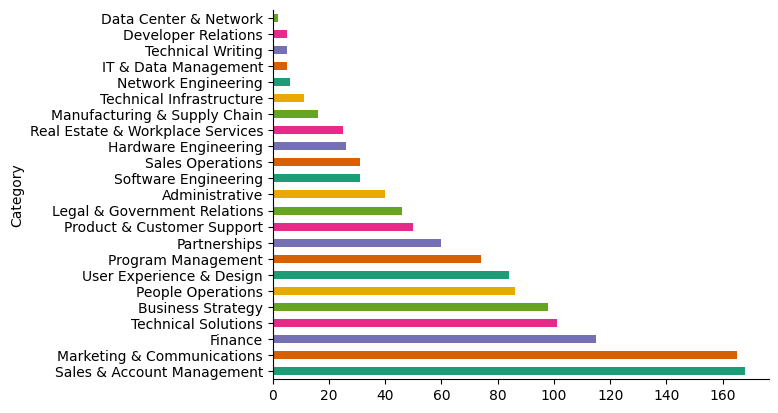

In [119]:
print("Unique categories",JD_dataset['Category'].unique().size)
JD_dataset['Category'].value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [90]:
JD_dataset = JD_dataset.drop(columns=['Company', 'Title', 'Location'])
JD_dataset.head(5)

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Program Management,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Manufacturing & Supply Chain,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Technical Solutions,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Developer Relations,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Program Management,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [91]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [92]:
JD_dataset['Details'] = JD_dataset['Responsibilities'] + ' ' + JD_dataset['Minimum Qualifications'] + ' ' + JD_dataset['Preferred Qualifications']
JD_dataset = JD_dataset.drop(columns=['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications'])
JD_dataset['Details'] = JD_dataset['Details'].str.lower()

lemmatizer = WordNetLemmatizer()
JD_dataset['Details'] = JD_dataset['Details'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split('.')]))
JD_dataset.head(5)

JD_dataset['Details'] = JD_dataset['Details'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
JD_dataset.head(5)

,Category,Details
0,Program Management,"shape, shepherd, ship, show technical programs..."
1,Manufacturing & Supply Chain,drive cross-functional activities supply chain...
2,Technical Solutions,collect analyze data draw insight identify str...
3,Developer Relations,"work one-on-one top android, ios, web engineer..."
4,Program Management,plan requirements internal customers provide p...


In [99]:
pattern = r'[^\w\s]'
JD_dataset['Details'] = JD_dataset['Details'].replace(pattern, ' ', regex=True)
JD_dataset.head(5)

,Category,Details
0,Program Management,shape shepherd ship show technical programs...
1,Manufacturing & Supply Chain,drive cross functional activities supply chain...
2,Technical Solutions,collect analyze data draw insight identify str...
3,Developer Relations,work one on one top android ios web engineer...
4,Program Management,plan requirements internal customers provide p...


In [146]:
import pandas as pd
from collections import defaultdict

word_freq_by_category = defaultdict(lambda: defaultdict(int))

for index, row in JD_dataset.iterrows():
    category = row['Category']
    details = row['Details']
    for word in details.split():
        word_freq_by_category[category][word] += 1

df_word_freq = pd.DataFrame({
    'Category': [],
    'Word': [],
    'Frequency': []
})

for category, word_freq in word_freq_by_category.items():
    for word, freq in word_freq.items():
        if freq >= 12 and freq <= 50:
            df_word_freq = pd.concat([df_word_freq, pd.DataFrame({'Category': [category], 'Word': [word], 'Frequency': [freq]})], ignore_index=True)

df_word_freq.head(5)

,Category,Word,Frequency
0,Program Management,support,43.0
1,Program Management,solutions,47.0
2,Program Management,key,20.0
3,Program Management,metrics,20.0
4,Program Management,identify,18.0


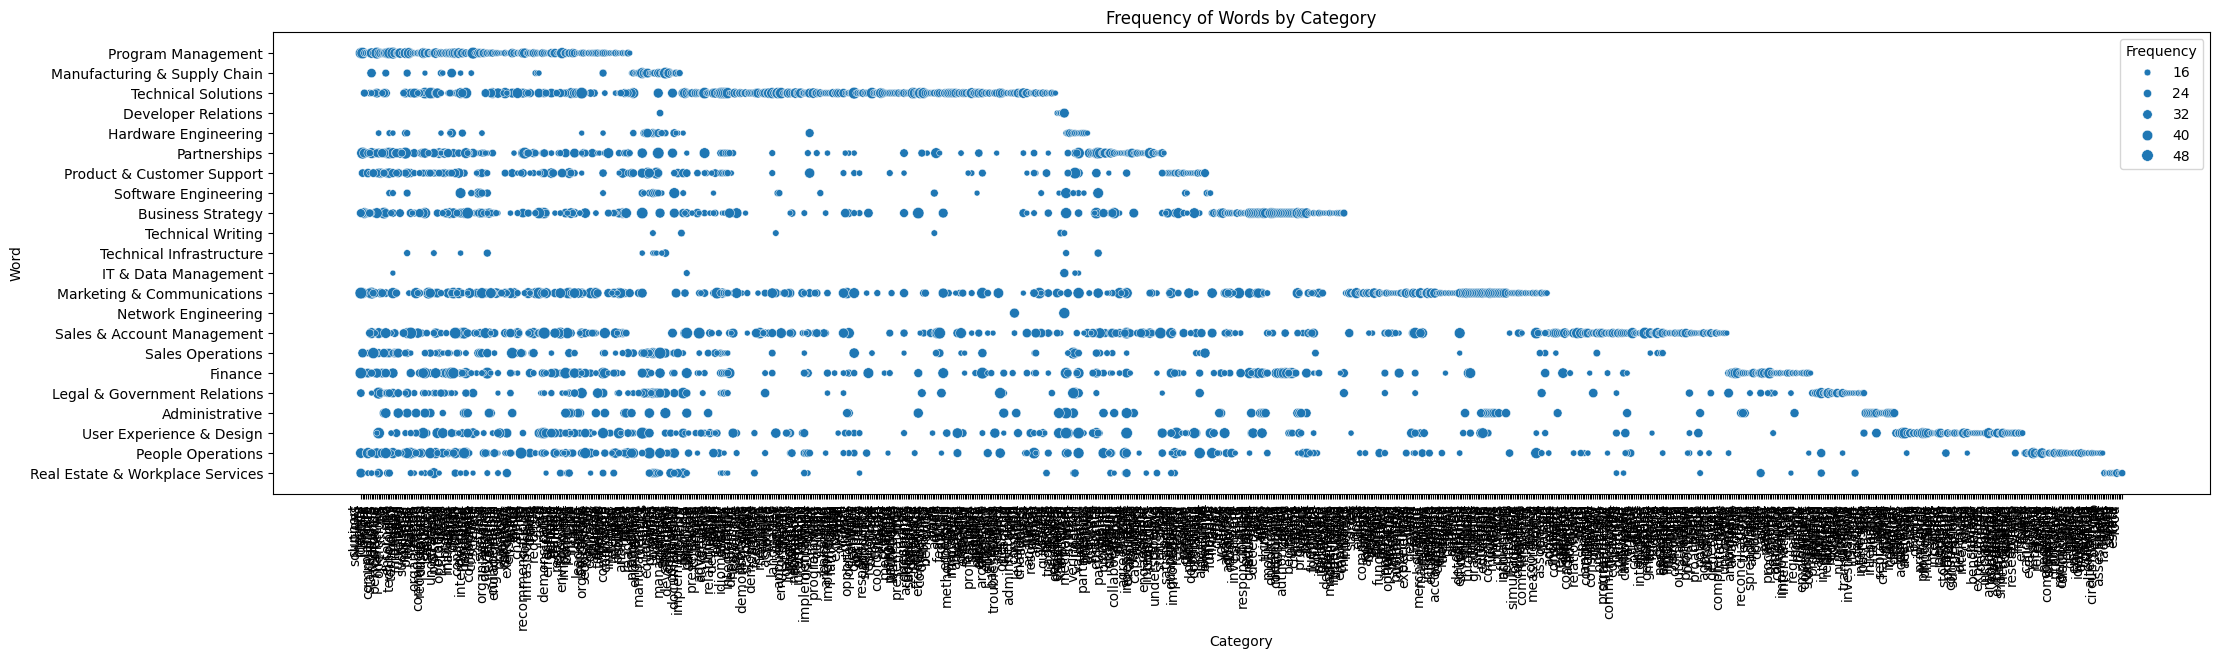

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))
sns.scatterplot(x='Word', y='Category', size='Frequency', data=df_word_freq)
plt.xlabel('Category')
plt.ylabel('Word')
plt.title('Frequency of Words by Category')
plt.xticks(rotation=90, ha='right')
plt.show()


In [148]:
df_pivot = df_word_freq.pivot_table(index='Word', columns='Category', values='Frequency', aggfunc='sum', fill_value=0)
print(df_pivot.shape)
df_pivot.head(20)

(990, 22)


Category,Administrative,Business Strategy,Developer Relations,Finance,Hardware Engineering,IT & Data Management,Legal & Government Relations,Manufacturing & Supply Chain,Marketing & Communications,Network Engineering,...,Product & Customer Support,Program Management,Real Estate & Workplace Services,Sales & Account Management,Sales Operations,Software Engineering,Technical Infrastructure,Technical Solutions,Technical Writing,User Experience & Design
Word,,,,,,,,,,,,,,,,,,,,,
10,30.0,14.0,0.0,14.0,0.0,0.0,0.0,0.0,43.0,0.0,...,0.0,20.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,32.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,13.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2019,30.0,37.0,0.0,36.0,0.0,0.0,0.0,0.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
3,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,16.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,14.0
4,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,17.0,18.0,0.0,0.0,0.0,0.0,17.0


In [149]:
df_pivot.shape

(990, 22)